In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chisquare
from scipy import stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm

In [2]:
pd.read_csv('spstat1.csv', sep=',', encoding='euc-kr')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1


In [3]:
df = pd.read_csv('spstat1.csv', sep=',', encoding='euc-kr')

In [4]:
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [5]:
df.tail(2)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1
251,72,2,5,2,250,1,4,2,3,3,...,2,1,0,3,2,8,3,6,1,1


In [6]:
df[1:5] # 1행 부터 4행까지 표시 

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [7]:
df[:3]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1


In [8]:
df[247:]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1
251,72,2,5,2,250,1,4,2,3,3,...,2,1,0,3,2,8,3,6,1,1


In [9]:
df['구매장소']

0      1
1      3
2      1
3      3
4      5
      ..
247    5
248    5
249    1
250    1
251    2
Name: 구매장소, Length: 252, dtype: int64

In [10]:
df.columns[[1,4,5]]

Index(['사용브랜드', '구매가격', '정보획득'], dtype='object')

In [11]:
df[df.columns[[1,4,5]]]

,사용브랜드,구매가격,정보획득
0,1,15,1
1,1,20,4
2,1,25,1
3,1,26,4
4,1,30,6
...,...,...,...
247,2,200,6
248,2,200,6
249,2,200,2
250,2,200,2


In [12]:
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [13]:
df.loc[:, '학력':'결혼'] # offset index (포함)

,학력,직업,월수입,결혼
0,2,4,2,2
1,4,4,4,2
2,4,7,4,2
3,2,2,5,3
4,4,9,2,1
...,...,...,...,...
247,7,8,2,1
248,6,4,6,2
249,6,4,3,2
250,2,1,2,1


In [14]:
df.iloc[1:7, 2:5]

,사용기간,구매장소,구매가격
1,3,3,20
2,2,1,25
3,5,3,26
4,3,5,30
5,1,4,30
6,5,2,40


In [15]:
df.at[5,'구매가격'] # 구매가격 열의 5행 표시

30

In [16]:
df['구매가격'] < 50 # masking

0       True
1       True
2       True
3       True
4       True
       ...  
247    False
248    False
249    False
250    False
251    False
Name: 구매가격, Length: 252, dtype: bool

In [17]:
df[df['구매가격'] < 50] # 구매가격이 50 미만인 구매가격의 값 표시

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [18]:
df[(df['구매가격']>150)&(df['구매가격']<200)]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
233,206,2,3,4,160,6,1,5,3,1,...,3,3,1,2,1,5,8,1,1,3
234,140,2,3,4,170,6,3,5,1,2,...,1,2,1,3,2,4,2,5,1,4
235,128,2,5,4,180,6,4,3,4,5,...,5,3,1,6,3,1,9,3,3,2
236,25,2,3,5,180,6,5,3,3,3,...,4,4,1,4,2,6,4,5,1,4
237,149,2,2,3,182,6,2,5,2,3,...,3,4,1,3,2,4,4,6,2,2
238,244,2,4,1,190,5,5,2,3,5,...,4,2,0,5,3,4,4,2,2,4
239,90,2,3,2,190,6,2,2,2,4,...,4,5,0,4,2,4,4,5,1,4


In [19]:
df_columns = df.copy() # 깊은 복사 >> 사본 생성

In [20]:
df_columns.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [21]:
df_columns.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [22]:
df_columns.rename(columns={'월수입':'경제수준'}, inplace=True) 
# 변수 이름 변경

In [23]:
df_columns.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '경제수준',
       '결혼', '가족수'],
      dtype='object')

In [24]:
df_columns['사용기간'].head()

0    3
1    3
2    2
3    5
4    3
Name: 사용기간, dtype: int64

In [25]:
df_columns['실사용기간'] = df_columns['사용기간']*1.5 
df_columns.head(3)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도10_명성,성별,연령,연령2,학력,직업,경제수준,결혼,가족수,실사용기간
0,181,1,3,1,15,1,2,1,2,4,...,3,0,4,2,2,4,2,2,3,4.5
1,94,1,3,3,20,4,3,3,4,3,...,5,1,3,2,4,4,4,2,3,4.5
2,12,1,2,1,25,1,1,1,3,2,...,4,0,4,2,4,7,4,2,1,3.0


In [26]:
df_columns.insert(6, '실제기간', df_columns['사용기간'])
# 6번째 자리에 새롭게 계산한 변수 추가 

In [27]:
df_columns.head(3)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,실제기간,구입조언,하루사용시간,브랜드이미지,...,구매중요도10_명성,성별,연령,연령2,학력,직업,경제수준,결혼,가족수,실사용기간
0,181,1,3,1,15,1,3,2,1,2,...,3,0,4,2,2,4,2,2,3,4.5
1,94,1,3,3,20,4,3,3,3,4,...,5,1,3,2,4,4,4,2,3,4.5
2,12,1,2,1,25,1,2,1,1,3,...,4,0,4,2,4,7,4,2,1,3.0


기술통계

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chisquare 
from scipy import stats
import scipy as sp 
import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm

In [30]:
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [33]:
# 기술통계 >> 요약통계량 
df['구매가격'].describe()

count    252.000000
mean     101.226190
std       38.654982
min       10.000000
25%       80.000000
50%      100.000000
75%      120.000000
max      250.000000
Name: 구매가격, dtype: float64

In [34]:
df['구매가격'].kurtosis() # 첨도

1.3613500036652209

In [35]:
df['구매가격'].skew()
# (+) 왜도를 가지고 있음>> 약간 왼쪽으로 첨도가 구성 >> 오른쪽으로 꼬리가 길다 

0.8074518614845148

In [36]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [37]:
df.head(2)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3


In [38]:
df['사용브랜드']

0      1
1      1
2      1
3      1
4      1
      ..
247    2
248    2
249    2
250    2
251    2
Name: 사용브랜드, Length: 252, dtype: int64

In [39]:
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

In [40]:
df['사용브랜드'].replace([1,2], ['삼성', '애플'])

0      삼성
1      삼성
2      삼성
3      삼성
4      삼성
       ..
247    애플
248    애플
249    애플
250    애플
251    애플
Name: 사용브랜드, Length: 252, dtype: object

In [41]:
df['사용브랜드'].replace([1,2], ['삼성', '애플']).value_counts()

삼성    127
애플    125
Name: 사용브랜드, dtype: int64

<AxesSubplot:>

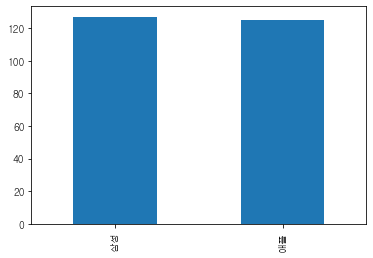

In [49]:
%matplotlib inline
df['사용브랜드'].replace([1,2], ['삼성', '애플']).value_counts().plot(kind='bar')

In [43]:
df['성별']

0      0
1      1
2      0
3      0
4      0
      ..
247    0
248    0
249    0
250    1
251    0
Name: 성별, Length: 252, dtype: int64

In [44]:
df['성별'].replace([0,1], ['여성','남성'])

0      여성
1      남성
2      여성
3      여성
4      여성
       ..
247    여성
248    여성
249    여성
250    남성
251    여성
Name: 성별, Length: 252, dtype: object

In [54]:
df['성별'].replace([0,1], ['남성','여성']).value_counts()

남성    126
여성    126
Name: 성별, dtype: int64

In [52]:
df.성별

0      0
1      1
2      0
3      0
4      0
      ..
247    0
248    0
249    0
250    1
251    0
Name: 성별, Length: 252, dtype: int64

<AxesSubplot:ylabel='성별'>

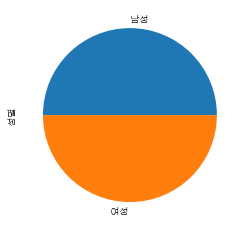

In [50]:
%matplotlib inline
df['성별'].replace([0,1], ['남성','여성']).value_counts().plot(kind='pie')

### 교차분석(카이제곱 검정)

In [55]:
# X^2 = sum((O-E)^2 / E ) : 오이를 제곱하면 이가 빠진다. 

pd.crosstab(df['월수입'], df['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


- c: degrees of freedom 
- o: observed value
- E :expected value

In [57]:
import numpy as np

fobs = df.월수입
fexp = df.사용브랜드
fexp = fexp * (np.sum(fobs)/np.sum(fexp)) 
chisquare(f_obs=fobs, f_exp=fexp)

# pvalue=9.618060771117479e-05 >> 0.0000961806.....

# 결과해석 
# 카이제곱 분석 결과, 통계량은 343.2642 이며, 유의성 검정 결과, pvalue가 0.00009618 로 
# 0.05보다 작기 때문에 통계적으로 유의하다. 
# 즉, 월수입별 사용브랜드는 차이가 있다. 
# 귀무가설(H0)인 월수입별 사용브랜드는 차이가 없다를 기각하고, 
# 연구가설(Ha)인 월수입별 사용브랜드는 차이가 있다를 채택한다.

Power_divergenceResult(statistic=343.26420150053593, pvalue=9.618060771117479e-05)

In [58]:
chisquare(df['구매장소'])
# 구매장소별로 차이가 없다 pvalue (=0.999)> 0 >> 통계적으로 유의하지 않음

Power_divergenceResult(statistic=148.31174089068827, pvalue=0.9999999645077914)

In [59]:
chisquare(df['성별'])
# 성별간 차이가 없다 pvalue (=0.999)> 0 >> 통계적으로 유의하지 않음

Power_divergenceResult(statistic=126.0, pvalue=0.9999999999973191)

In [60]:
df.성별.value_counts()

0    126
1    126
Name: 성별, dtype: int64

In [61]:
import numpy as np
fobs = np.array([10,20])
fexp = np.array([30,60])
# adjust the totals
# gives array([10., 20.]), the same as observed
fexp = fexp * (np.sum(fobs)/np.sum(fexp)) 
chisquare(f_obs=fobs, f_exp=fexp)
# the correct result
# Power_divergenceResult(statistic=0.0, pvalue=1.0)

# 관찰빈도(fobs)와 기대빈도(fexp)가 정확히 일치 해야 함 
# 한 벡터는 다른 벡터의 정확한 배수여야 함 (p-value =1 >> 전혀 유효하지 않음)
# (f_obs=[10,20], f_exp=[30,60])
# Power_divergenceResult(statistic=40.0, pvalue=2.5396285894708634e-10)
# p-value가 0에 가까우기 때문에 유효함 
# ((10-30)**2 /30) + ((20-60)** 2 / 60) = 40

Power_divergenceResult(statistic=0.0, pvalue=1.0)

### t 검정

In [62]:
df['구매가격']

0       15
1       20
2       25
3       26
4       30
      ... 
247    200
248    200
249    200
250    200
251    250
Name: 구매가격, Length: 252, dtype: int64

In [63]:
df['구매가격'].values

array([ 15,  20,  25,  26,  30,  30,  40,  40,  40,  40,  40,  45,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  60,  60,  60,  60,
        60,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  72,  75,  75,  75,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  85,
        89,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  95,  99, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 130, 130, 130, 150,  10,  48,  50,
        50,  70,  70,  70,  70,  75,  80,  80,  80,  80,  89,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [64]:
mean = df['구매가격'].values

In [65]:
df['사용브랜드']

0      1
1      1
2      1
3      1
4      1
      ..
247    2
248    2
249    2
250    2
251    2
Name: 사용브랜드, Length: 252, dtype: int64

In [72]:
df[df['사용브랜드'] == 1].구매가격.values

array([ 15,  20,  25,  26,  30,  30,  40,  40,  40,  40,  40,  45,  50,
        50,  50,  50,  50,  50,  50,  50,  50,  50,  60,  60,  60,  60,
        60,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  70,  70,  72,  75,  75,  75,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  85,
        89,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  95,  99, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 110, 110, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 130, 130, 130, 150], dtype=int64)

In [73]:
mean1 = df[df['사용브랜드'] == 1].구매가격.values # 삼성(1)을 사용하는 구매자의 구매가격

In [75]:
mean2 = df[df['사용브랜드'] == 2].구매가격.values # 애플(2)을 사용하는 구매자의 구매가격

C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


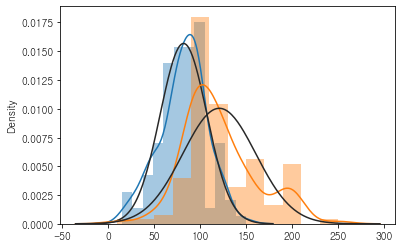

In [83]:
%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm) # 삼성(1)의 정규분포(kde)
sns.distplot(mean2, kde=True, fit=sp.stats.norm) # 애플(2)의 정규분포(kde)
plt.show()

In [84]:
sp.stats.shapiro(mean1) # 삼성(1)에 대해 shapiro 검증을 함 
# shapiro-wilk test on normally distribution test (정규성 검정 테스트)
# https://www.statology.org/shapiro-wilk-test-python/

# 결과해석 
# 샤피로 정규성 검정 결과, 통계량은 0.972 이며, pvalue(=0.0099) < 0.05 으므로 
# 사용브랜드 1(삼성) 통계적으로 유의함. 
# 귀무가설인 '데이터가 정규분포를 따른다'를 기각, '데이터가 정규분포를 따르지 않는다' 채택 
# 정규성 위배 

ShapiroResult(statistic=0.9720979928970337, pvalue=0.009973179548978806)

In [78]:
sp.stats.shapiro(mean2)
# 결과해석 
# 샤피로 정규성 검정 결과, 통계량은 0.925이며, pvalue(=3.2917737371462863e-06 = 0.00000329) < 0.05 으므로 
# 사용브랜드 2(애플) . 
# 귀무가설인 '데이터가 정규분포를 따른다'를 기각, '데이터가 정규분포를 따르지 않는다' 채택 
# 정규성 위배 

ShapiroResult(statistic=0.925286054611206, pvalue=3.2917737371462863e-06)

In [85]:
# 레빈의 등분산 가정(**** 강사직을 걸고...)
sp.stats.levene(mean1, mean2)
# pvalue=0.00030 < 0.05 >>> 등분산 가정 위배 
# 삼성(1), 애플(2) 집단 간 등분산은 같다는 귀무가설을 기각, 
# 따라서, 두 집단은 등분산에 차이가 있다. >>> 등분산 가정 위배
# 등분산 가정을 충족하지 못함


LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [86]:
stats.ttest_ind(mean1, mean2, equal_var=False)
# ttest_ind : independanct 2 sample t-test (독립적인 두 집단의 평균의 차이 분석)
# 결과 해석 :  통계량 -9.200, pvalue=3.598124628532717e-17 < 0.05 
# 결론: 귀무가설 기각, 연구가설 채택 >> 삼성, 애플 구매가격은 차이가 있다.
# 귀무가설(H0): 독립적인 두 집단(삼성, 애플) 평균의 차이가 없다 
# 연구가설(Ha) : 독립적인 두 집단(삼성, 애플) 평균의 차이가 있다

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)

In [88]:
df['재구매의향'].values

array([3, 3, 2, 5, 3, 2, 5, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 3, 4, 3,
       5, 3, 2, 3, 3, 2, 5, 1, 3, 2, 3, 3, 5, 2, 3, 3, 3, 2, 1, 1, 4, 2,
       1, 3, 5, 4, 1, 2, 2, 4, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 2, 3, 5, 1,
       4, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 5, 3, 1, 4, 3, 4, 1, 3, 5, 1, 3,
       5, 3, 5, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 5, 1, 1, 3, 3,
       3, 3, 1, 1, 2, 5, 5, 5, 1, 1, 3, 1, 1, 4, 4, 3, 1, 1, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 5, 2, 5, 2, 2, 1, 2, 1, 2, 2, 3,
       3, 3, 5, 5, 5, 4, 5, 4, 2, 3, 3, 2, 1, 2, 2, 2, 4, 2, 2, 2, 3, 3,
       1, 2, 2, 3, 1, 4, 3, 2, 2, 2, 2, 5, 5, 4, 5, 3, 4, 2, 3, 2, 3, 3,
       3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 3, 3, 1, 4, 4, 4, 5, 3, 1, 2, 2, 2,
       5, 5, 2, 1, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2, 2, 5, 3, 2, 4, 3, 4, 5,
       4, 3, 2, 3, 2, 3, 3, 4, 3, 3], dtype=int64)

In [89]:
mean = df['재구매의향'].values
mean1 = df[df['사용브랜드']==1].재구매의향.values
mean2 = df[df['사용브랜드']==2].재구매의향.values

C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


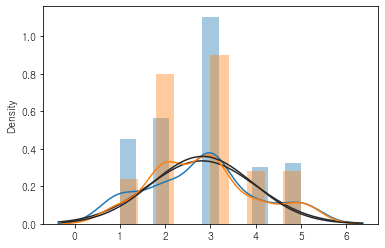

In [93]:
%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm) # 삼성(1)의 정규분포(kde)
sns.distplot(mean2, kde=True, fit=sp.stats.norm) # 애플(2)의 정규분포(kde)
plt.show()

In [91]:
sp.stats.shapiro(mean1) # 삼성
# 통계량 0.8974, pvalue=7.541181901160598e-08 < 0.05 
# Normal distribution (정규분포를 따름)
# 표본이 정규분포에서 나온 것이라 할 수 있음

ShapiroResult(statistic=0.8974907994270325, pvalue=7.541181901160598e-08)

In [94]:
sp.stats.shapiro(mean2) # 애플
# shapiro 정규성 검정
# 통계량 0.8939, pvalue=5.995764240651624e-08 < 0.05 
# Normal distribution (정규분포를 따름)
# 표본이 정규분포에서 나온 것이라 할 수 있음

ShapiroResult(statistic=0.8939267992973328, pvalue=5.995764240651624e-08)

In [95]:
sp.stats.levene(mean1, mean2)
# 레빈 등분산성 검정 
# 통계량 0.117,   pvalue=0.7315465812585951 > 0.05 (등분산 가정 충족)

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585951)

In [116]:
stats.ttest_ind(mean1, mean2, equal_var = True)
# 독립적인 두 집단(삼성, 애플)은 등분산 가정을 전제로, 
# 독립 t 검정 결과(ttest_ind), 통계량은 -0.089, 
#  pvalue=0.9290258377820513 > 0.05 
# 통계적으로 유의하지 않음 >> 귀무가설 기각하지 못함 
# 유의한 차이가 없음.

Ttest_indResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513)

### 분산분석

In [99]:
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [101]:
# 연령, 재구매의향 

df['연령2'].values

array([2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1,
       3, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1,
       3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1, 2,
       3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 3, 3, 3, 3, 3, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 3, 3, 2, 1, 2, 2, 1,
       3, 3, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 2, 2, 3, 2, 3, 3,
       3, 2, 2, 1, 2, 1, 1, 2, 1, 2], dtype=int64)

In [102]:
# 연령, 재구매의향 

df['연령2'].value_counts()

2    120
1     90
3     42
Name: 연령2, dtype: int64

In [108]:
df[df['연령2'] == 1]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,206,2,3,4,160,6,1,5,3,1,...,3,3,1,2,1,5,8,1,1,3
245,114,2,5,2,200,5,1,3,2,3,...,3,3,0,2,1,2,7,3,2,3
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2


In [106]:
df[df['연령2'] == 1].재구매의향.values

array([3, 2, 2, 2, 3, 1, 4, 3, 3, 1, 3, 3, 2, 1, 4, 2, 3, 1, 2, 4, 2, 3,
       4, 1, 3, 4, 1, 1, 1, 3, 3, 3, 2, 3, 1, 3, 1, 1, 2, 5, 5, 5, 1, 1,
       3, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 4, 3, 1, 4, 2, 3, 3, 1, 2, 2,
       3, 3, 2, 2, 1, 2, 1, 3, 3, 1, 1, 2, 1, 2, 4, 2, 3, 3, 3, 2, 3, 3,
       3, 3], dtype=int64)

In [107]:
anova1 = df[df['연령2'] == 1].재구매의향.values
anova2 = df[df['연령2'] == 2].재구매의향.values
anova3 = df[df['연령2'] == 3].재구매의향.values
# 연령2 : 3 집단으로 줄임(요인분석 결과)

C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

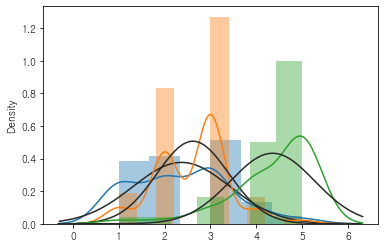

In [113]:
sns.distplot(anova1, kde=True, fit=sp.stats.norm) # kde = True (default)
sns.distplot(anova2, kde=True, fit=sp.stats.norm)
sns.distplot(anova3, kde=True, fit=sp.stats.norm)
plt.show()

In [110]:
sp.stats.shapiro(anova1)

ShapiroResult(statistic=0.8853521347045898, pvalue=9.482674840910477e-07)

In [111]:
sp.stats.shapiro(anova2)

ShapiroResult(statistic=0.8487668037414551, pvalue=9.90686754853698e-10)

In [112]:
sp.stats.shapiro(anova3)

ShapiroResult(statistic=0.710676908493042, pvalue=8.820003216669647e-08)

In [114]:
# 일원 분산분석 (one-way anova)
stats.f_oneway(anova1, anova2, anova3)
# 일원 분산분석 결과, 통계량은 72.426,  pvalue=1.613686022426391e-25 < 0.05 
# 결과해석 
# 귀무가설 : 세 집단의 모든 평균은 차이가 없다. 
# 연구가설 : 세 집단이 모든 평균은 차이가 없다고 말할 수 없다. 
# 사후 검정(사후 테스트) 필요

F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

In [122]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
# turkey HSD

tukey = pairwise_tukeyhsd(endog =df['재구매의향'], # data
                          groups=df['연령2'],      # groups
                          alpha = 0.05)             # significance level
                 

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1276,-0.0526,0.5526,False
1,3,1.9905,-0.0,1.585,2.396,True
2,3,1.7405,-0.0,1.3514,2.1295,True


In [123]:
# 결과해석 
# 1-3 , 2-3 집단 평균의 차이가 존재
# p-value (0.0) < alpha(=0.05), reject = True

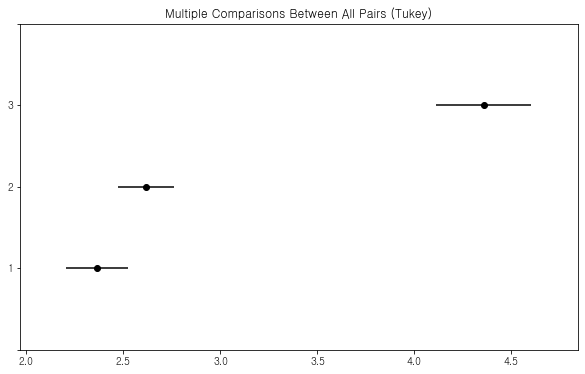

In [124]:
tukey.plot_simultaneous() # plot group confidence intervals 
plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color='red')
plt.show()

In [126]:
# 연령에 따른 구매가격의 차이 

df[df['연령2'] == 1].구매가격.values

array([ 30,  30,  40,  40,  40,  40,  50,  50,  60,  70,  70,  70,  70,
        70,  72,  75,  75,  80,  80,  80,  80,  80,  80,  89,  90,  90,
        90,  95, 100, 100, 100, 100, 100, 100, 100, 100, 110, 120, 120,
       120, 120, 120, 120, 120, 120, 150,  10,  50,  70,  70,  90,  90,
        90,  90,  90,  90, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 120, 120, 120, 120, 120, 120, 126, 130, 140,
       150, 150, 150, 150, 150, 150, 150, 160, 200, 200, 200, 200],
      dtype=int64)

In [127]:
anova1 = df[df['연령2'] == 1].구매가격.values
anova2 = df[df['연령2'] == 2].구매가격.values
anova3 = df[df['연령2'] == 3].구매가격.values

In [128]:
stats.f_oneway(anova1,anova2, anova3)
# 결과해석: 통계량 0.818,  pvalue=0.44245014422691564 > 0.05 
# 세 집단 평균의 차이가 없음 

F_onewayResult(statistic=0.8181036982598708, pvalue=0.44245014422691564)

C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\student\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

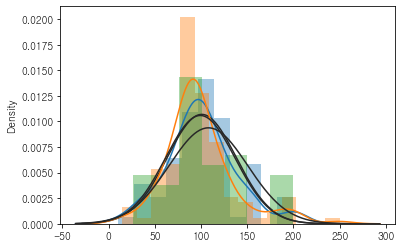

In [133]:
sns.distplot(anova1, kde=True, fit=sp.stats.norm)
sns.distplot(anova2, kde=True, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)
plt.show()

In [130]:
# 정규성 검정
print(sp.stats.shapiro(anova1)) # pvalue=0.0031593928579241037 < 0.05 
print(sp.stats.shapiro(anova2)) # pvalue=1.8951159574953635e-07 < 0.05 통계적으로 유의
print(sp.stats.shapiro(anova3)) # pvalue=0.055364940315485 > 0.05

ShapiroResult(statistic=0.9543994665145874, pvalue=0.0031593928579241037)
ShapiroResult(statistic=0.8997038006782532, pvalue=1.8951159574953635e-07)
ShapiroResult(statistic=0.9481290578842163, pvalue=0.055364940315485)


### 상관분석

In [134]:
sp.stats.pearsonr(df['재구매의향'], df['구입조언'])
# (0.41783620648818565, 4.546075388272401e-12)
# (상관계수, 유의성 여부) 
# 상관계수 0.417 로 약 상관관계 존재, pvalue(양측검정) (=4.546075388272401e-12) < 0.05 통계적으로 유의함
# return(Pearson’s correlation coefficient, 2-tailed p-value)

(0.41783620648818565, 4.546075388272401e-12)

In [135]:
corr = sp.stats.pearsonr(df['재구매의향'], df['구입조언'])
print('상관계수=%.3f, p-value=%.3f'%(corr))

상관계수=0.418, p-value=0.000


In [136]:
df.corr(method='pearson') # 피어슨 상관계수(연속적인 데이터) cf. 스피어만 상관계수(spearman)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-1.080086e-02,-0.038587,-3.437524e-03,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,7.936758e-03,0.035986,2.056873e-02,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,2.095292e-02,0.289194,2.802837e-01,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,1.116104e-01,0.063064,3.949891e-02,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,5.441430e-02,0.026217,4.756285e-02,0.102732,-0.021546,0.140954,0.010288,0.031466
정보획득,-0.051147,-0.056471,-0.041385,0.154155,0.036478,1.000000,0.044041,0.036552,-0.109654,0.001379,...,0.031857,0.084373,2.084692e-01,-0.028481,-5.093567e-02,-0.030649,0.040337,0.024921,-0.008287,0.110201
구입조언,-0.050270,-0.022794,0.163995,0.129688,0.166607,0.044041,1.000000,0.152128,0.255051,0.365651,...,0.315692,0.199148,9.656477e-02,0.623919,6.405167e-01,0.202405,-0.178018,0.203266,0.243664,-0.011434
하루사용시간,0.016985,-0.023418,-0.031484,0.096426,0.162502,0.036552,0.152128,1.000000,-0.045647,0.050846,...,0.019810,0.010031,-6.277929e-02,0.033098,2.471600e-02,0.225983,0.023726,0.107988,-0.087184,0.085902
브랜드이미지,0.136440,-0.086466,0.364656,-0.112618,0.016474,-0.109654,0.255051,-0.045647,1.000000,0.512966,...,0.240870,0.141335,-7.046798e-03,0.300457,3.383337e-01,0.089793,-0.023346,0.113624,0.121006,0.029519
가격만족도,0.078784,-0.048290,0.275456,-0.101271,0.121168,0.001379,0.365651,0.050846,0.512966,1.000000,...,0.283316,0.218231,-8.536627e-02,0.494699,5.186812e-01,0.057481,0.015575,0.137864,0.307197,0.079693


### 회귀분석(stats model 활용)

In [137]:
df.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

In [138]:
ols(formula='재구매의향~ 성별+연령+학력+월수입+사용기간+구매가격+구입조언+브랜드이미지+\
    가격만족도+구매중요도1_메모리+하루사용시간', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     51.44
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           7.46e-57
Time:                        14:31:30   Log-Likelihood:                -240.30
No. Observations:                 252   AIC:                             504.6
Df Residuals:                     240   BIC:                             547.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1580      0.226     -0.699      0.485      -0.603       0.287
성별             0.0573      0.085      0.672      0.502      -0.111       0.225
연령             0.0503      0.047      1.071      0.285      -0.042       0.143
학력             0.0062      0.025      0.246      0.806      -0.043       0.056
월수입           -0.0368      0.027     -1.372      0.171      -0.090       0.016
사용기간           0.1292      0.034      3.807      0.000       0.062       0.196
구매가격        3.583e-06      0.001      0.003      0.997      -0.002       0.002
구입조언           0.1206      0.049      2.459      0.015       0.024       0.217
브랜드이미지         0.4527      0.044     10.261      0.000       0.366       0.540
가격만족도          0.3961      0.052      7.626      0.000       0.294       0.498
구매중요도1_메모리    -0.0426      0.028     -1.538      0.125      -0.097       0.012
하루사용시간        -0.0010      0.031     -0.033      0.974      -0.062       0.060
==============================================================================
Omnibus:                        4.865   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.345
Skew:                          -0.249   Prob(JB):                        0.114
Kurtosis:                       2.592   Cond. No.                         611.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
ols(formula='재구매의향~ 사용기간+구입조언+가격만족도+브랜드이미지', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     140.4
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.15e-62
Time:                        14:37:20   Log-Likelihood:                -243.50
No. Observations:                 252   AIC:                             497.0
Df Residuals:                     247   BIC:                             514.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3117      0.144     -2.160      0.032      -0.596      -0.027
사용기간           0.1328      0.033      4.023      0.000       0.068       0.198
구입조언           0.1525      0.039      3.873      0.000       0.075       0.230
가격만족도          0.4133      0.048      8.563      0.000       0.318       0.508
브랜드이미지         0.4461      0.044     10.236      0.000       0.360       0.532
==============================================================================
Omnibus:                        5.351   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.625
Skew:                          -0.251   Prob(JB):                       0.0990
Kurtosis:                       2.565   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 결과해석 
# R-squared: 0.695 (69.5% 설명력)
# 사용기간, 구입조언, 브랜드이미지, 가격만족도 통계적으로 유의함 (pvalue = 0.000 < 0.05)
# Durbin-WatsonL: 2.126 (자기상관 없음) 
# 더빈왓슨 검정 (잔차끼리 자기상관성 있는지 판단) 0 또는 4에 가까울 수록 자기상관이 높음
# 2에 가까우면 자기상관 없음

In [ ]:
# VIF(분산팽창지수)
# VIF는 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정
# VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
model = ols(formula='재구매의향~ 사용기간+구입조언+가격만족도+브랜드이미지', data=df)

In [155]:
model.exog_names

['Intercept', '사용기간', '구입조언', '가격만족도', '브랜드이미지']

In [156]:
variance_inflation_factor(model.exog, 1) # 사용기간 1.170

1.1705634303536052

In [157]:
variance_inflation_factor(model.exog, 2) # 사용기간 1.165

1.1655306703099104

In [158]:
variance_inflation_factor(model.exog, 3) # 사용기간 1.487

1.4878509158799749

In [159]:
variance_inflation_factor(model.exog, 4) # 사용기간 1.471

1.4711901080508527

In [160]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,사용기간,1.170563
1,구입조언,1.165531
2,가격만족도,1.487851
3,브랜드이미지,1.471190


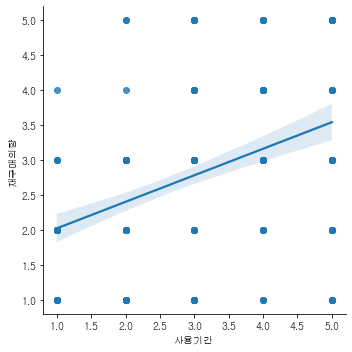

In [149]:
sns.lmplot(y='재구매의향', x='사용기간', data=df)